### Importowanie bibliotek

In [1]:
from nn.warstwy import Warstwa

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importowanie danych

In [2]:
dane = pd.read_csv('/Users/majkamiezianko/PycharmProjects/scientificProject1/heart.csv')

opis_kolumn={'age':'age',
             'sex':'gender',
             'cp':'chest pain type',
             'trestbps':'resting blood presure',
             'chol': 'cholesterol level',
             'fbs': 'fasting blood sugar',
             'restecg':'resting electrocardiographic results',
             'thalach':'maximum heart rate',
             'exang' : 'exercise including angina',
             'oldpeak':'ST depression',
             'slope':'slope of ST exercise',
             'ca':'number of major vessels',
             'thal':'defect in heart',
             'target': 'disease or not'            
            }

dane.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Sprawdzanie, czy występują braki danych

In [3]:
dane.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Statystyka opisowa

In [4]:
dane.describe()
dane.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Możemy zauwazyć, że ten zbiór danych zawiera 303 obserwacje i nie ma w nich braków danych.
Wyróżniamy w nim łącznie 13 features (czynników objaśniających) oraz jedną kolumnę, która
jest targetem, czyli zmienną zero-jedynkową. Zero oznacza brak choroby serca (138 obserwacji), zaś jeden występowanie
choroby serca (165 obserwacji).


Warto również zwrócić uwagę, że skala zmiennych jest zróżnicowana — podczas gdy maksymalna wartość
'age' wynosi 77, maksymalna wartość 'chol' równa się 256.



### Wizualizacja danych
W celu lepszego zrozumienia oraz objaśnienia datasetu wykonamy poniżej wizualizację danych.

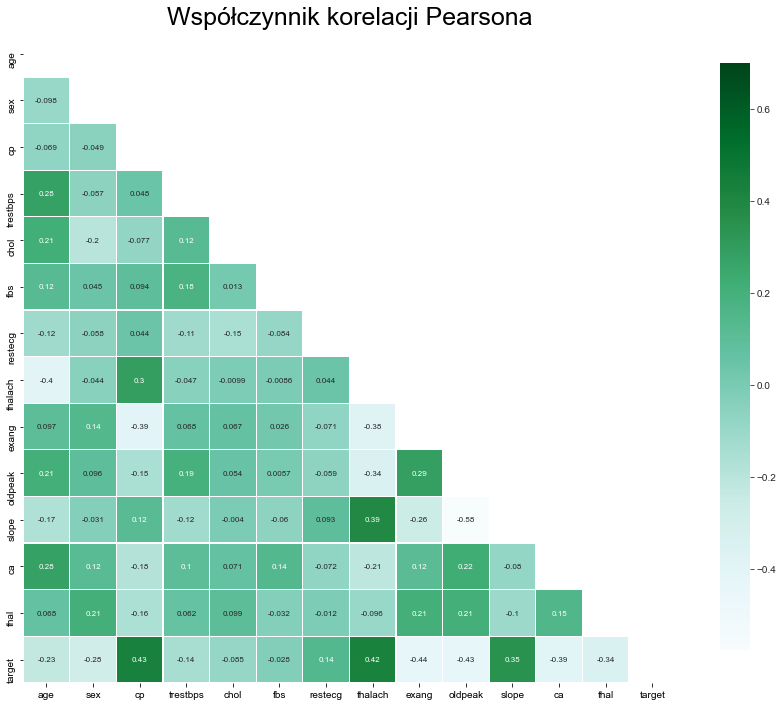

In [5]:
czynniki = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target']

mask = np.zeros_like(dane[czynniki].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Współczynnik korelacji Pearsona',fontsize=25)

sns.set_style('darkgrid')
sns.heatmap(dane[czynniki].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Zauważamy, że najbardziej skorelowane z targetem są zmienne:
* cp
* thalach
* exang
* oldpeak
* slope
* ca
* tha

Najbardziej skorelowane pomiędzy sobą są zaś zmienne:

* slope - oldpeak
* slope - thalach
* thalach - oldpeak
* thalach - exang
* thalach - age
* exang - cp


Sprawdzamy jaki jest rozkład Y - targetu wśród poszczególnych czynników

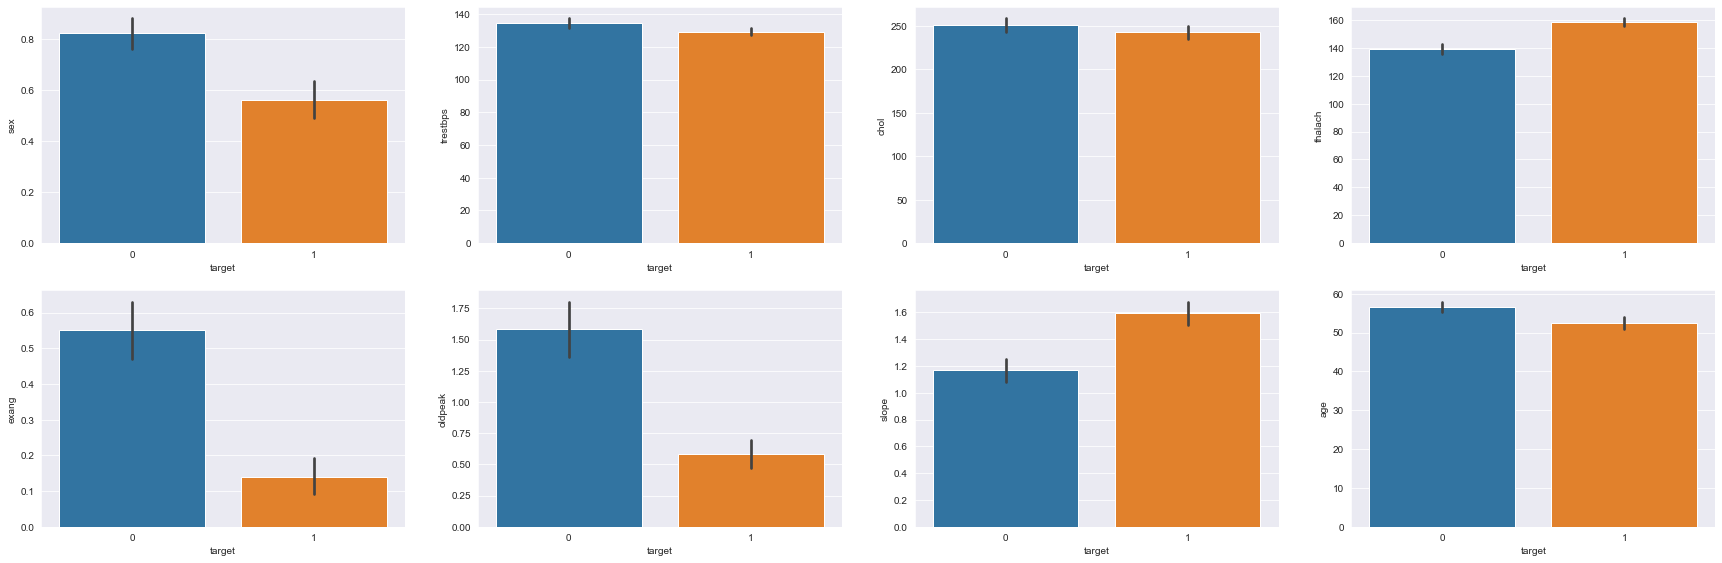

<Figure size 432x288 with 0 Axes>

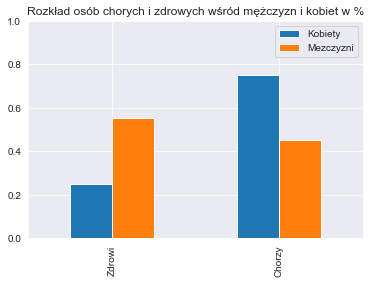

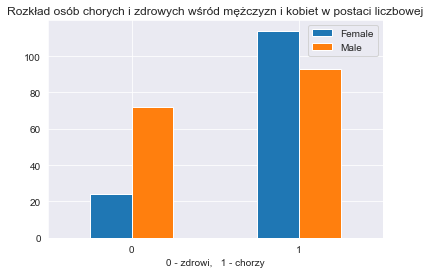

In [6]:
plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
sns.barplot(x = 'target', y = 'sex', data = dane)

plt.subplot(4,4,2)
sns.barplot(x = 'target', y = 'trestbps', data = dane)

plt.subplot(4,4,3)
sns.barplot(x = 'target', y = 'chol', data = dane)


plt.subplot(4,4,4)
sns.barplot(x = 'target', y = 'thalach', data = dane)

plt.subplot(4,4,5)
sns.barplot(x = 'target', y = 'exang', data = dane)

plt.subplot(4,4,6)
sns.barplot(x = 'target', y = 'oldpeak', data = dane)

plt.subplot(4,4,7)
sns.barplot(x = 'target', y = 'slope', data = dane)

plt.subplot(4,4,8)
sns.barplot(x = 'target', y = 'age', data = dane)

#Drugi wykres

ax=plt.figure();
dane_kobiety=dane.loc[dane['sex']==0]
kobiety_chore=len(dane_kobiety.loc[dane_kobiety['target']==1])/len(dane_kobiety)
kobiety_zdrowe=len(dane_kobiety.loc[dane_kobiety['target']==0])/len(dane_kobiety)

dane_mezczyzni=dane.loc[dane['sex']==1]
mezczyzni_chorzy=len(dane_mezczyzni.loc[dane_mezczyzni['target']==1])/len(dane_mezczyzni)
mezczyzni_zdrowi=len(dane_mezczyzni.loc[dane_mezczyzni['target']==0])/len(dane_mezczyzni)

kobiety={'Zdrowi':kobiety_zdrowe, 'Chorzy':kobiety_chore}
mezczyzni={'Zdrowi':mezczyzni_zdrowi, 'Chorzy':mezczyzni_chorzy}
plec_porownanie = pd.DataFrame({'Kobiety':kobiety,'Mezczyzni':mezczyzni})
plec_porownanie.plot.bar(title='Rozkład osób chorych i zdrowych wśród mężczyzn i kobiet w %',ylim=(0,1))

pd.crosstab(dane['sex'],dane['target']).plot(kind='bar',title='Rozkład osób chorych i zdrowych wśród mężczyzn i kobiet w postaci liczbowej');
plt.legend(['Female','Male']);
plt.xlabel("0 - zdrowy,   1 - chorzy");
plt.xticks(rotation=0);